## Task-D: Collinear features and their effect on linear models

In [222]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
data = pd.read_csv('task_d.csv')
data.shape

(100, 8)

In [224]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [225]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [226]:
features = np.array(data.columns.tolist()[:-1])
features

array(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w'], dtype='<U9')

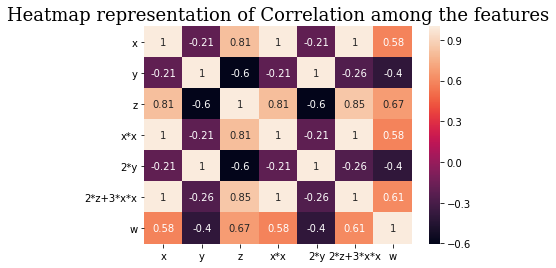

In [227]:
sns.heatmap(data.iloc[:, :-1].corr(), annot=True)
plt.title('Heatmap representation of Correlation among the features', fontsize=18, fontfamily='serif');

## Observation
<pre>
(1)   x, x*x, 2*z+3*x*x are highly correlated to eachother
(2)   y, 2*y are highly correlated to eachother, actually y and 2*y are not two different featues but the are the same features written twice, i.e. y==2*y
</pre>

# Logistic Regression

In [228]:
lr_clf = SGDClassifier(loss='log', n_jobs=-1, random_state=40)
skf = StratifiedKFold()
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200]}

gs = GridSearchCV(lr_clf, cv=skf, param_grid=params, n_jobs=-1, return_train_score=True)
gs.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SGDClassifier(loss='log', n_jobs=-1, random_state=40),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100,
                                   200]},
             return_train_score=True)

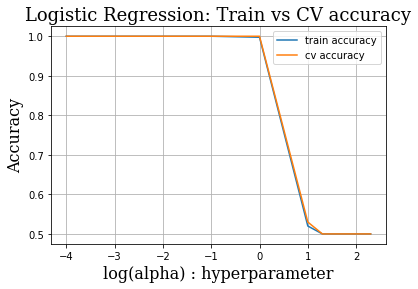

In [229]:
plt.plot(np.log10(params['alpha']), gs.cv_results_['mean_train_score'], label='train accuracy')
plt.plot(np.log10(params['alpha']), gs.cv_results_['mean_test_score'], label='cv accuracy')

plt.title('Logistic Regression: Train vs CV accuracy', fontsize=18, fontfamily='serif')
plt.xlabel('log(alpha) : hyperparameter', fontsize=16, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=16, fontfamily='serif')
plt.grid()
plt.legend();

In [230]:
lr_best_alpha = 1

lr_best_model = SGDClassifier(loss='log', alpha=lr_best_alpha, random_state=40)
lr_best_model.fit(X,Y)
y_pred = lr_best_model

best_model_accuracy = lr_best_model.score(X,Y)
lr_w1 = lr_best_model.coef_[0]

print('Train accuracy = ', best_model_accuracy)
print("Weight in Logistic Regression before adding noise:\n", lr_w1)

Train accuracy =  1.0
Weight in Logistic Regression before adding noise:
 [ 0.17128698 -0.18676813  0.25988441  0.16747661 -0.18676813  0.18210691
  0.15115333]


In [231]:
noise = 0.01
X_new = X + noise

lr_best_model.fit(X_new, Y)

best_model_accuracy_edited = lr_best_model.score(X,Y)
lr_w2 = lr_best_model.coef_[0]

print('Train accuracy = ', best_model_accuracy)
print("Weight in Logistic Regression after adding noise:\n", lr_w2)

Train accuracy =  1.0
Weight in Logistic Regression after adding noise:
 [ 0.17115784 -0.18699788  0.25970141  0.16734567 -0.18699788  0.18197286
  0.15096434]


In [232]:
lr_diff_accuracy = best_model_accuracy_edited - best_model_accuracy
print('Change in train accuracy before and after adding the noise:\n', svm_diff_accuracy)

Change in train accuracy before and after adding the noise:
 0.0


In [233]:
lr_diff_w = np.abs(lr_w1 - lr_w2)
print('Absolute change in weights before and after adding the noise:\n', lr_diff_w)

Absolute change in weights before and after adding the noise:
 [0.00012914 0.00022975 0.00018301 0.00013094 0.00022975 0.00013404
 0.00018899]


In [234]:
print('Top 4 features which have higher % change in weights are:')
features[np.argsort(lr_diff_w/lr_w1*100)[-4::]].tolist()

Top 4 features which have higher % change in weights are:


['2*z+3*x*x', 'x', 'x*x', 'w']

## Observation:
<pre>
since features  '2*z+3*x*x',  'x'  and  'x*x'  are highly correlated, that is why theese features are in top four features having higher % change in weights
</pre>

# SVM

In [236]:
svm_clf = SGDClassifier(loss='hinge', n_jobs=-1, random_state=40)
skf = StratifiedKFold()
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200]}

gs = GridSearchCV(svm_clf, cv=skf, param_grid=params, n_jobs=-1, return_train_score=True)
gs.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SGDClassifier(n_jobs=-1, random_state=40), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100,
                                   200]},
             return_train_score=True)

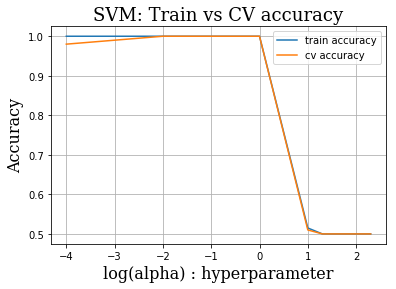

In [237]:
plt.plot(np.log10(params['alpha']), gs.cv_results_['mean_train_score'], label='train accuracy')
plt.plot(np.log10(params['alpha']), gs.cv_results_['mean_test_score'], label='cv accuracy')

plt.title('SVM: Train vs CV accuracy', fontsize=18, fontfamily='serif')
plt.xlabel('log(alpha) : hyperparameter', fontsize=16, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=16, fontfamily='serif')
plt.grid()
plt.legend();

In [238]:
svm_best_alpha = 1

svm_best_model = SGDClassifier(loss='hinge', alpha=svm_best_alpha, random_state=40)
svm_best_model.fit(X,Y)

best_model_accuracy = svm_best_model.score(X,Y)

svm_w1 = svm_best_model.coef_[0]

print('Train accuracy = ', best_model_accuracy)
print("Weights in SVM before adding noise:\n", svm_w1)

Train accuracy =  1.0
Weights in SVM before adding noise:
 [ 0.16820631 -0.2238531   0.35667768  0.16073787 -0.2238531   0.18772804
  0.13398037]


In [239]:
noise = 0.01
X_new = X + noise

svm_best_model.fit(X_new, Y)

best_model_accuracy_edited = svm_best_model.score(X_new,Y)
svm_w2 = svm_best_model.coef_[0]

print('Train accuracy = ', best_model_accuracy_edited)
print("Weights in SVM after adding noise:\n", svm_w2)

Train accuracy =  1.0
Weights in SVM after adding noise:
 [ 0.1660081  -0.22344469  0.35550689  0.15879637 -0.22344469  0.18585499
  0.13544447]


In [240]:
svm_diff_accuracy = best_model_accuracy_edited - best_model_accuracy
print('Change in train accuracy before and after adding the noise:\n', svm_diff_accuracy)

Change in train accuracy before and after adding the noise:
 0.0


In [241]:
svm_diff_w = np.abs(svm_w1 - svm_w2)
print('Absolute change in weights before and after adding the noise:\n', svm_diff_w)

Absolute change in weights before and after adding the noise:
 [0.00219821 0.00040841 0.00117079 0.0019415  0.00040841 0.00187305
 0.0014641 ]


In [242]:
print('Top 4 features which have higher % change in weights are:')
features[np.argsort(svm_diff_w/svm_w1*100)[-4::]].tolist()

Top 4 features which have higher % change in weights are:


['2*z+3*x*x', 'w', 'x*x', 'x']

## Observation:
<pre>
since features '2*z+3*x*x', 'x' and 'x*x' are highly correlated, that is why theese features are in top four features having higher % change in weights, maximum % change is found to be in feature 'x'.
</pre>